# Polynomial Regression

### Dataset context

You have an HR department in your company and you're hiring people for some open positions.
Once you've interviewed a candidate, you can give her/his an offer and then ask the question about the expected salary.
So, you need to use the available data about positions and levels to validate what the candidate coud be asking for his/her salary.

In [1]:
DATASET_PATH = "../../../../datasets/ml_az_course/004_position_salaries.csv"

### Importing the libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Importing the dataset

In [3]:
dataset = pd.read_csv(DATASET_PATH)
x = dataset.iloc[:, 1:-1].values # we don't use first column "Position"
y = dataset.iloc[:, -1].values

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Training the Linear Regression model on the whole dataset

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
linear_regressor = LinearRegression()
linear_regressor.fit(X=x, y=y)

LinearRegression()

### Training the Polynomial Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_reg = PolynomialFeatures(degree=2) # whith a higher degree it will be overfitted

x_poly = poly_reg.fit_transform(X=x) # matrix of features


In [8]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X=x_poly, y=y)

LinearRegression()

### Visualising the Linear Regression results

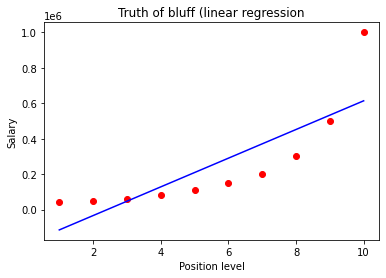

In [9]:
plt.scatter(x=x, y=y, color="red")
plt.plot(x, linear_regressor.predict(x), color="blue")
plt.title("Truth or bluff (linear regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

### Visualising the Polynomial Regression results

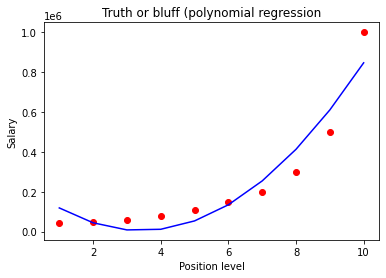

In [11]:
plt.scatter(x=x, y=y, color="red")
plt.plot(x, lin_reg_2.predict(x_poly), color="blue")
plt.title("Truth or bluff (polynomial regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

### Visualising the Polynomial Regression results (for higher resolution and smoother curve)

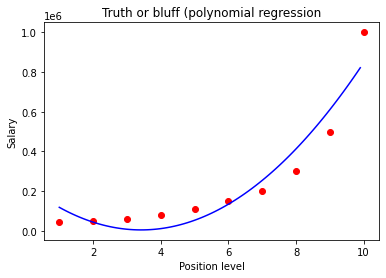

In [15]:
x_grid = np.arange(start=min(x), stop=max(x), step=0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x=x, y=y, color="red")
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color="blue")
plt.title("Truth or bluff (polynomial regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

### Predicting a new result with Linear Regression

In [18]:
linear_regressor.predict(X=[[6.5]])

array([330378.78787879])

### Prediction a new result with Polynomial Regression

In [19]:
lin_reg_2.predict(X=poly_reg.fit_transform([[6.5]]))

array([189498.10606061])